# Project Goal

1. Understanding the variables that are influencing the customers
to migrate.
2. Creating Churn risk scores that can be indicative to drive
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.



---
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



---

# Install Mysql Connector for fetching data

In [2]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 20.8 MB/s eta 0:00:00


---
# Fetching data

In [3]:
import mysql.connector
import pandas as pd

# connect to SQL database
conn = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom"
)

# fetch data
query = "SELECT * FROM telecom_churn_data"
df = pd.read_sql(query, conn)

df.columns = [
    'State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
    'Night Charge', 'International Mins', 'International Calls',
    'International Charge', 'CustServ Calls', 'Churn'
]


/tmp/ipython-input-1380507037.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


---
#Basic Checks

In [4]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

---
### Data Type Conversion



In [6]:
print("Unique values in 'International Plan':", df['International Plan'].unique())
print("Unique values in 'VMail Plan':", df['VMail Plan'].unique())
print("Unique values in 'Churn':", df['Churn'].unique())

Unique values in 'International Plan': [' no' ' yes']
Unique values in 'VMail Plan': [' yes' ' no']
Unique values in 'Churn': [' False.' ' True.']


In [7]:
numeric_cols = [
    'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
    'Night Charge', 'International Mins', 'International Calls',
    'International Charge', 'CustServ Calls'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'International Plan' and 'VMail Plan' to numerical (0/1)
# Clean strings by stripping whitespace and converting to lowercase before mapping
df['International Plan'] = df['International Plan'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['VMail Plan'] = df['VMail Plan'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Convert 'Churn' to numerical (0/1)
# Clean strings by stripping whitespace (case 'True.' and 'False.' must be preserved)
df['Churn'] = df['Churn'].str.strip().map({'True.': 1, 'False.': 0})

# Verify the data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   object 
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   int64  
 5   VMail Plan            4617 non-null   int64  
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   object 
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   int64  
 5   VMail Plan            4617 non-null   int64  
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [9]:
df.isnull().sum()

,0
State,0
Account Length,0
Area Code,0
Phone,0
International Plan,0
VMail Plan,0
VMail Message,0
Day Mins,0
Day Calls,0
Day Charge,0


In [10]:
df.nunique()

,0
State,51
Account Length,218
Area Code,3
Phone,4617
International Plan,2
VMail Plan,2
VMail Message,47
Day Mins,1901
Day Calls,123
Day Charge,1901


In [11]:
print('Statistical summary of numerical columns:')
df.describe()

Statistical summary of numerical columns:


,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,0.096600,0.267706,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,39.597194,0.295444,0.442812,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [12]:
print('Statistical summary of categorical columns:')
df.describe(include=['object'])

Statistical summary of categorical columns:


,State,Area Code,Phone
count,4617,4617,4617
unique,51,3,4617
top,WV,415,409-6884
freq,149,2299,1


---
# Column Classification for EDA


In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

binary_categorical_cols = ['International Plan', 'VMail Plan', 'Churn']

# Move binary-encoded columns from numerical to categorical
for col in binary_categorical_cols:
    if col in numerical_cols:
        numerical_cols.remove(col)
        categorical_cols.append(col)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International Calls', 'International Charge', 'CustServ Calls']
Categorical Columns: ['State', 'Area Code', 'Phone', 'International Plan', 'VMail Plan', 'Churn']


---
# EDA





## Univariate Analysis

### Univariate Analysis for Numerical Columns

I will use histograms to observe the distribution of each numerical feature and box plots to identify potential outliers and spread of the data.

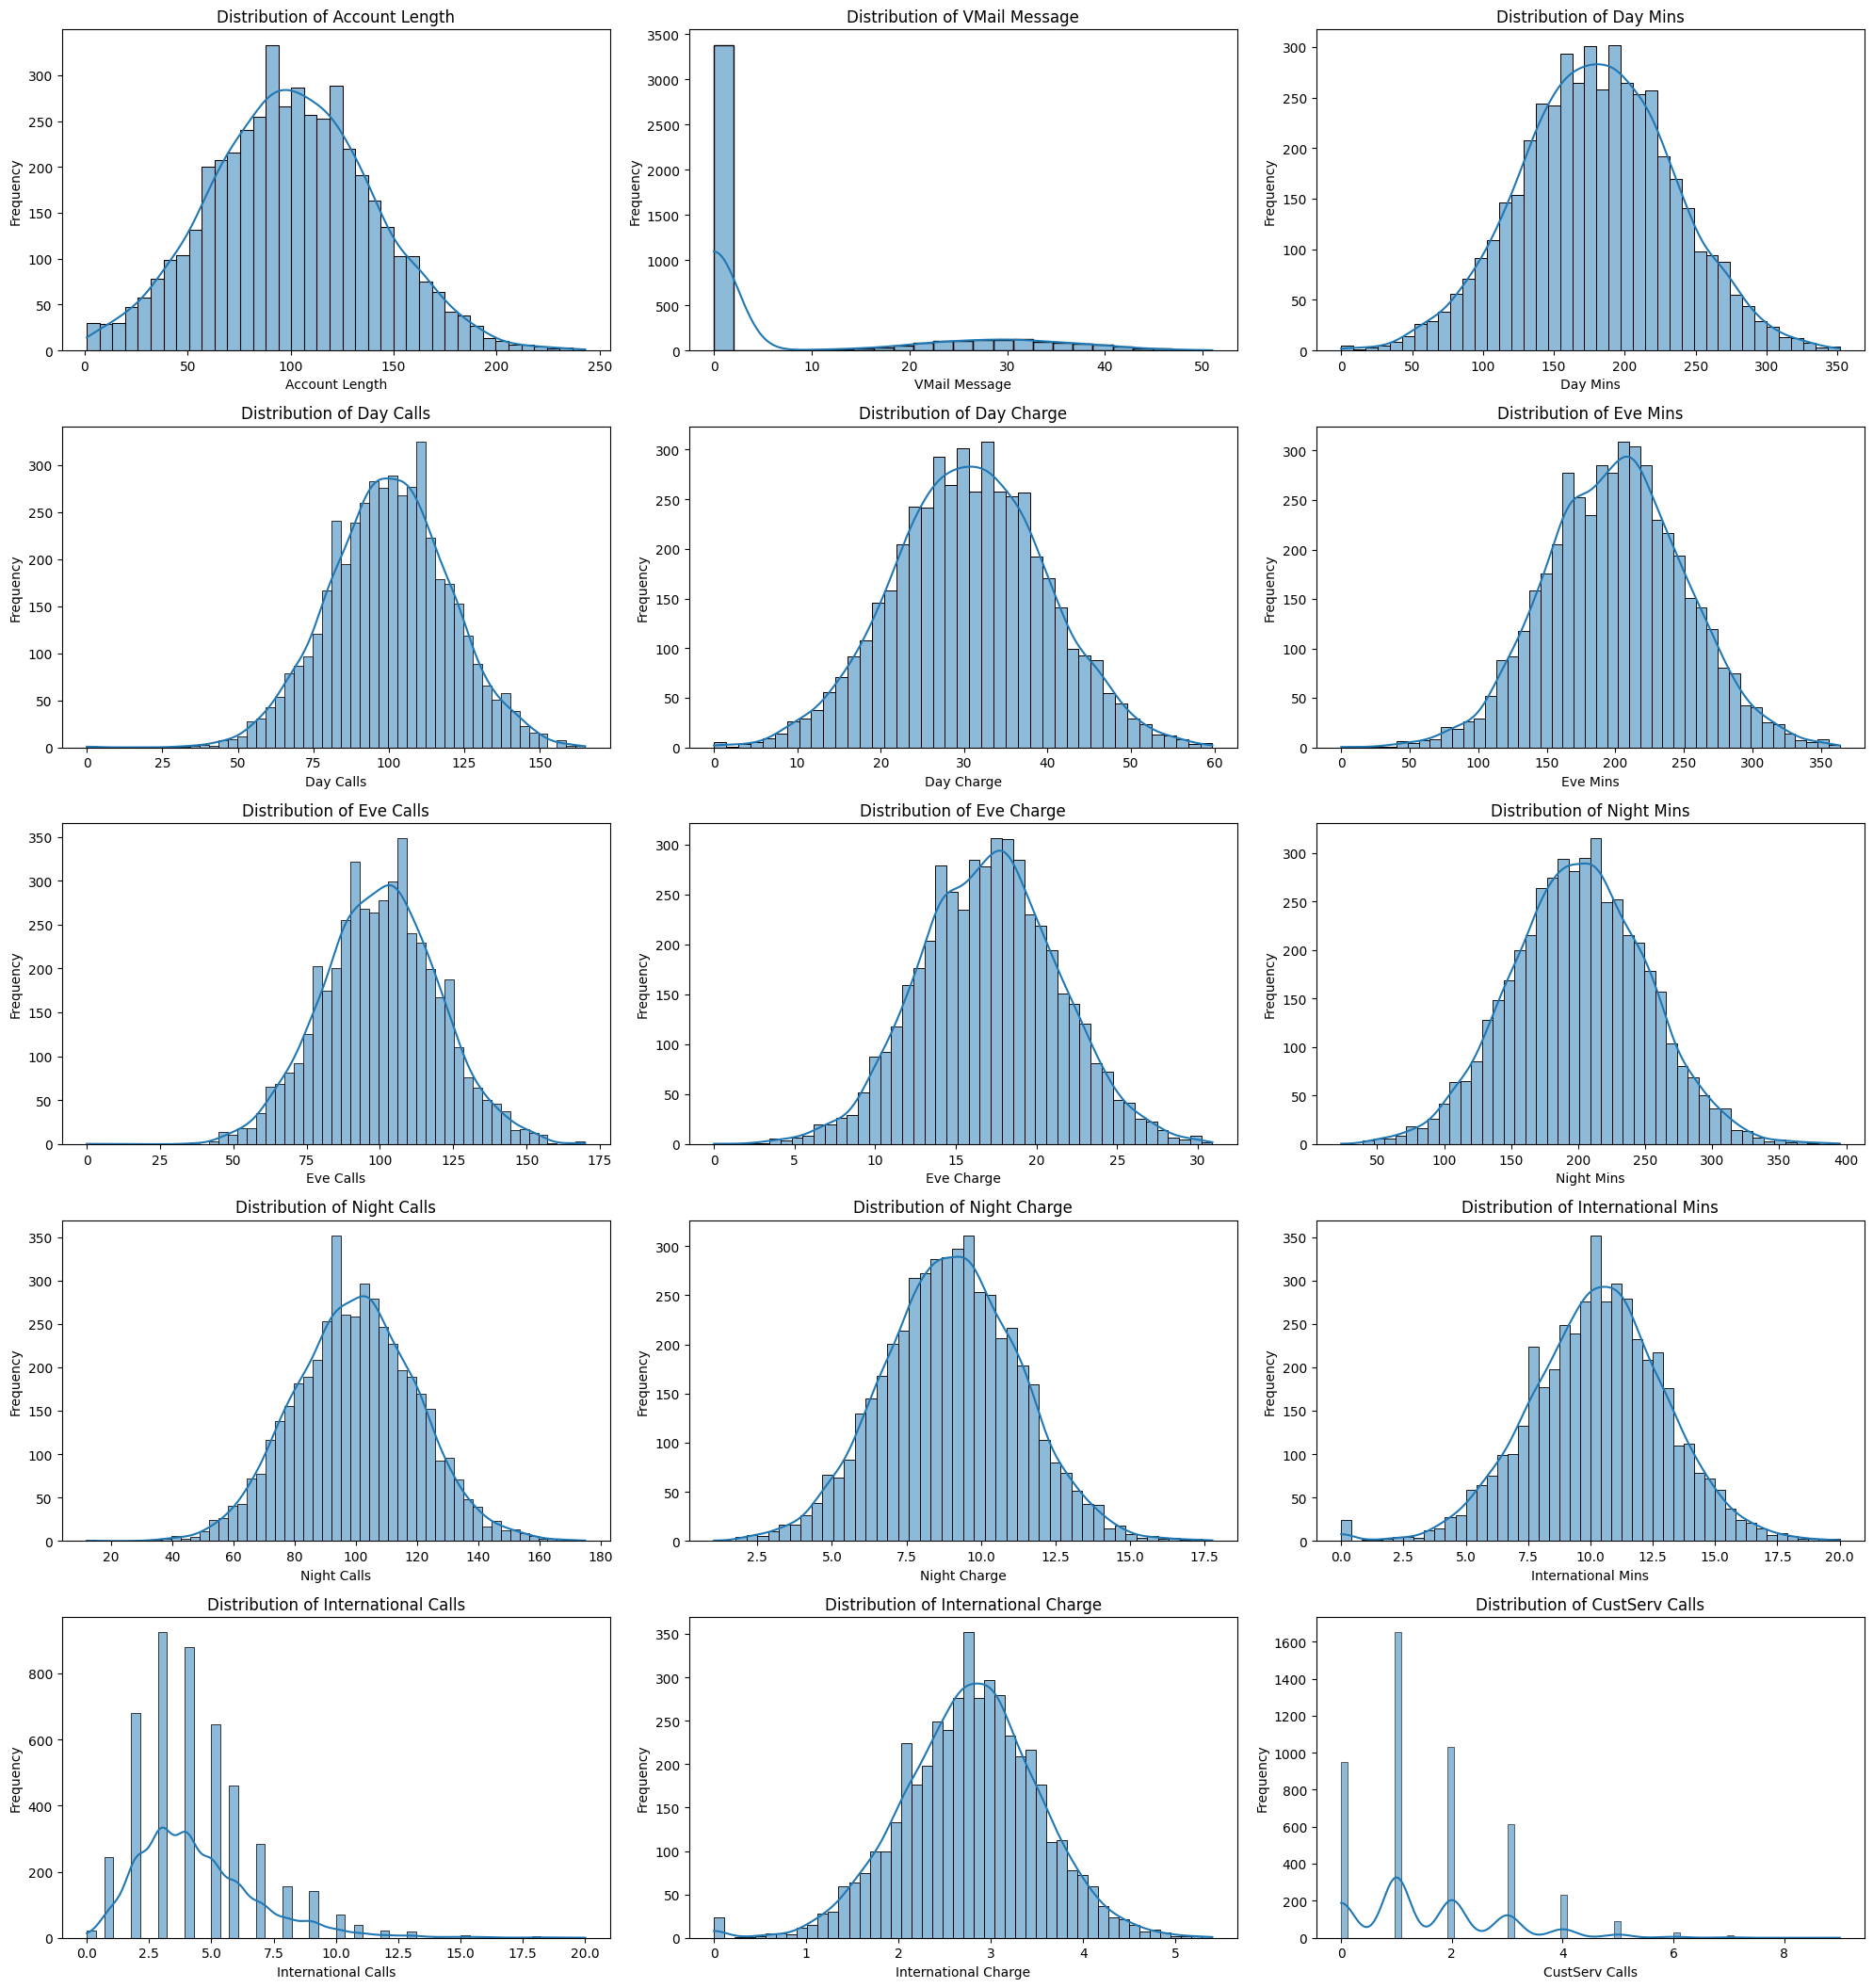

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

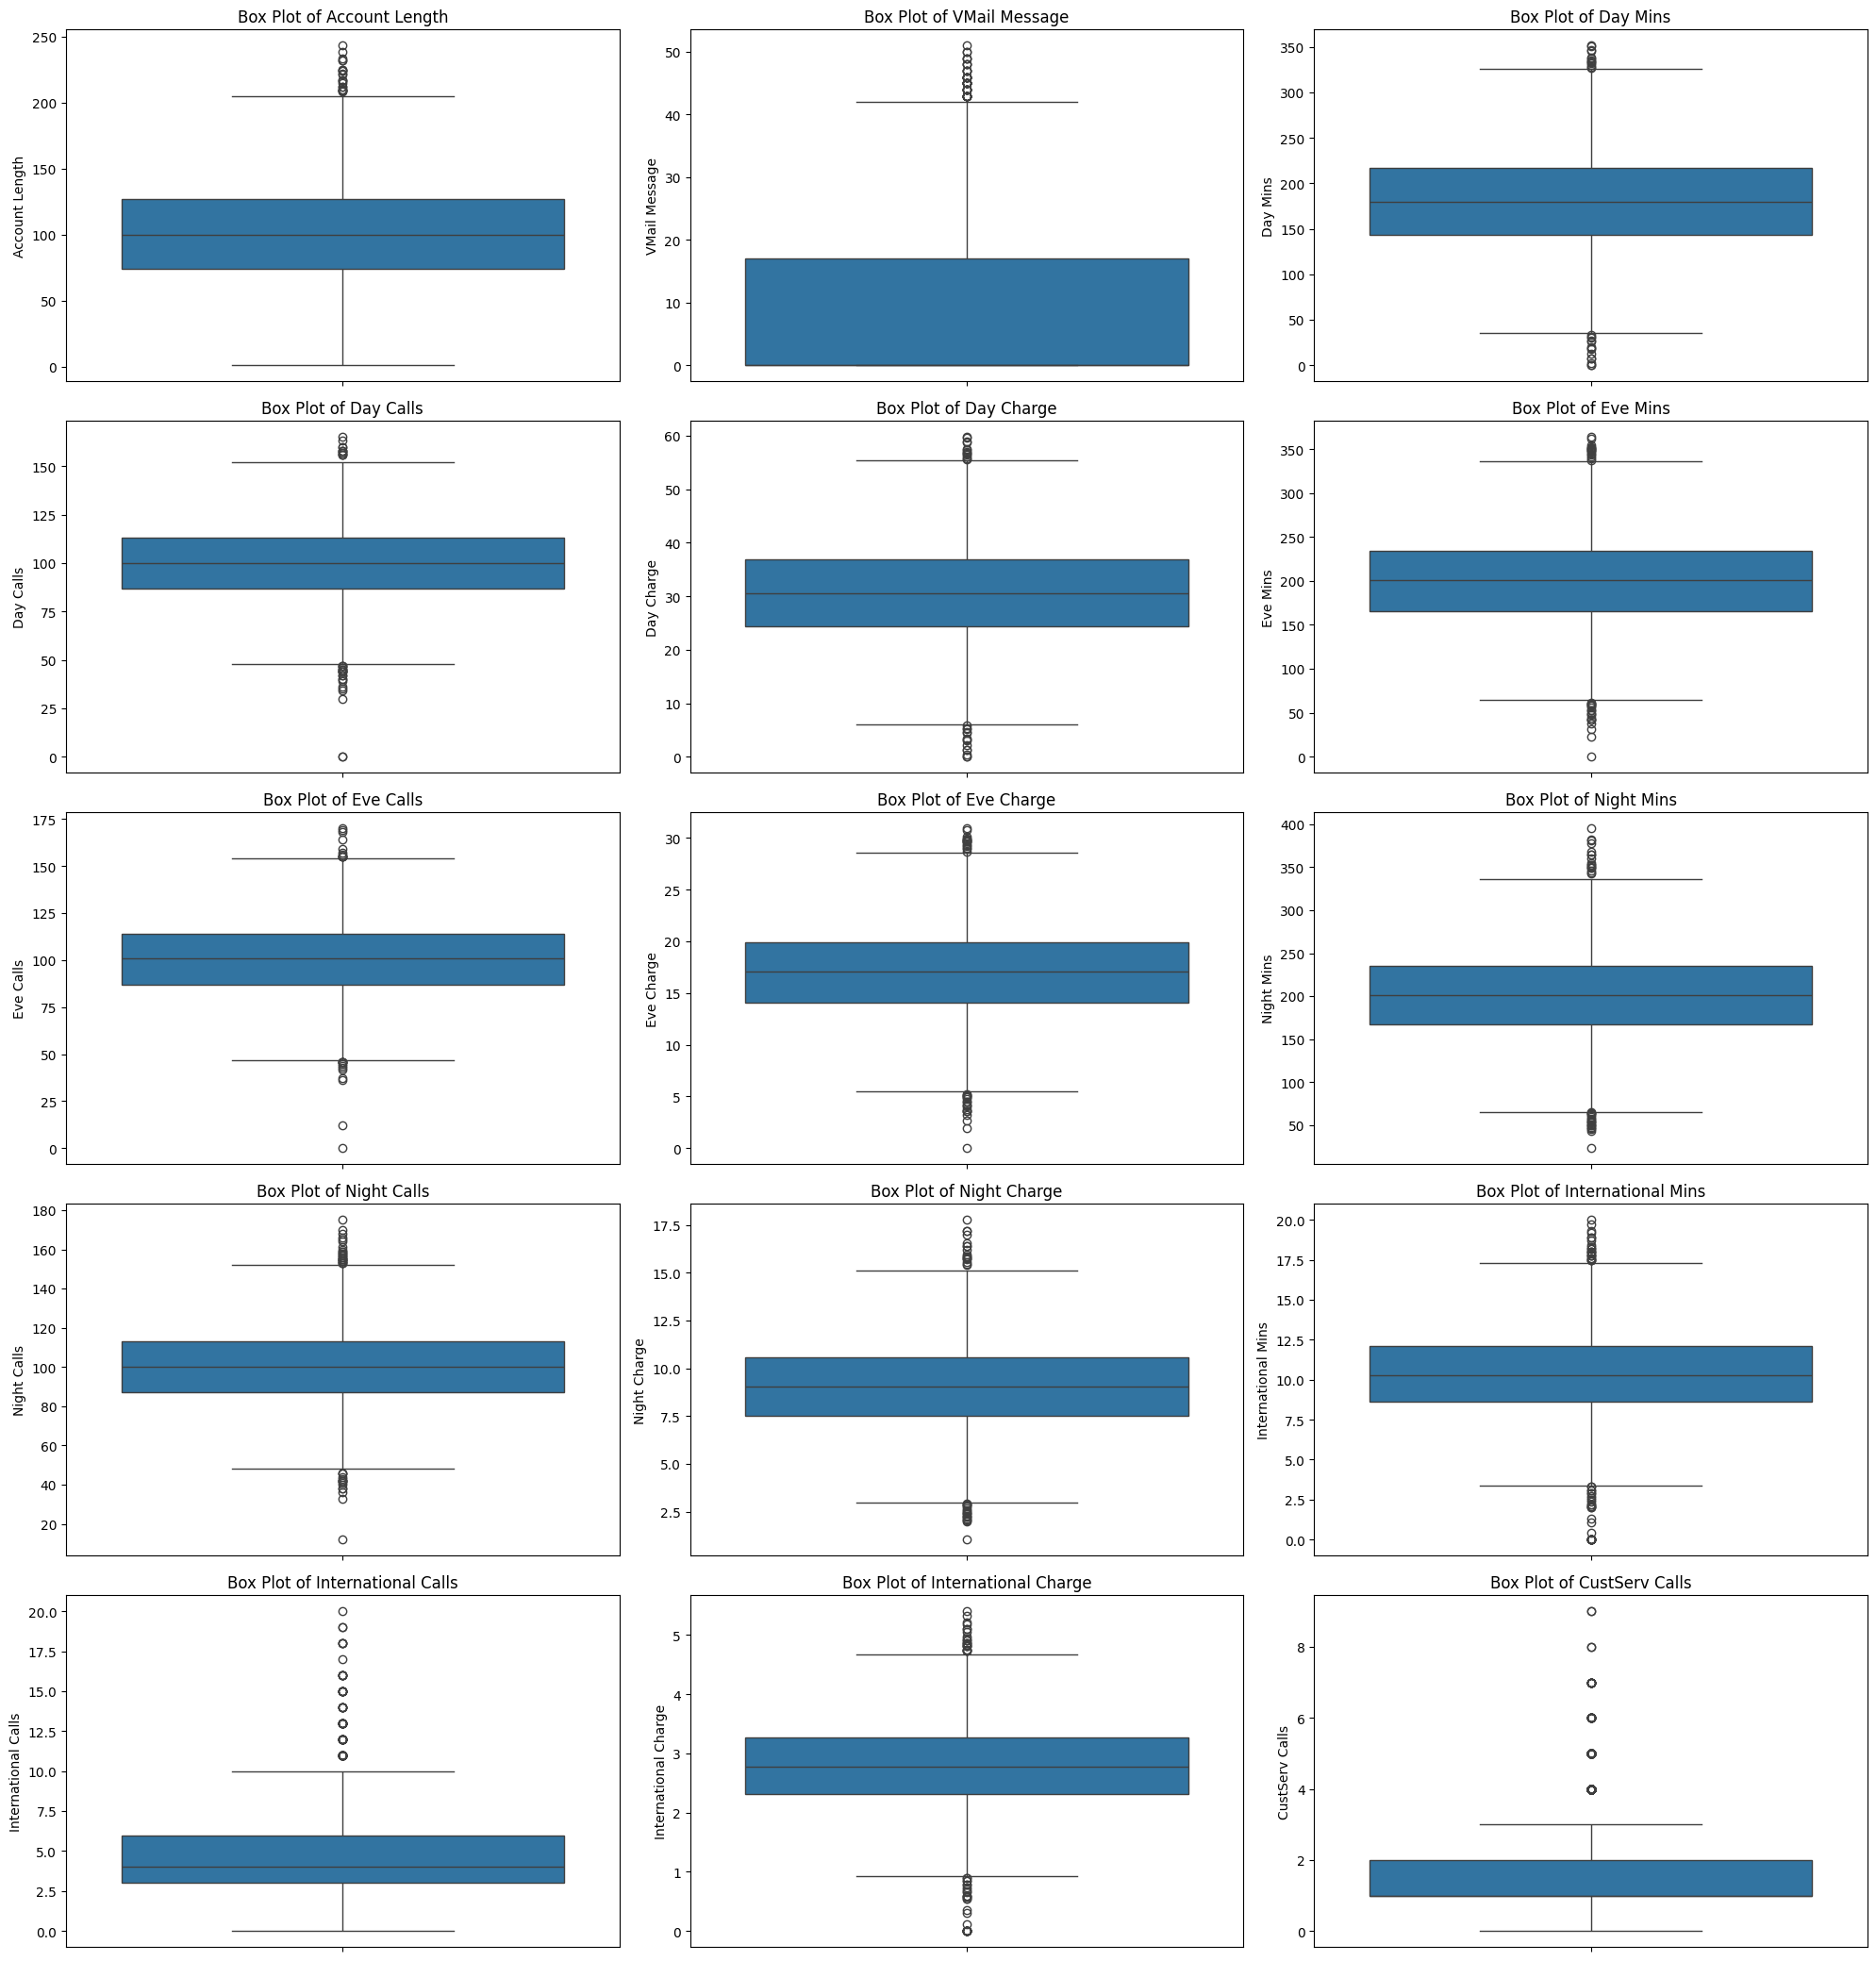

In [15]:
# Box plots for numerical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

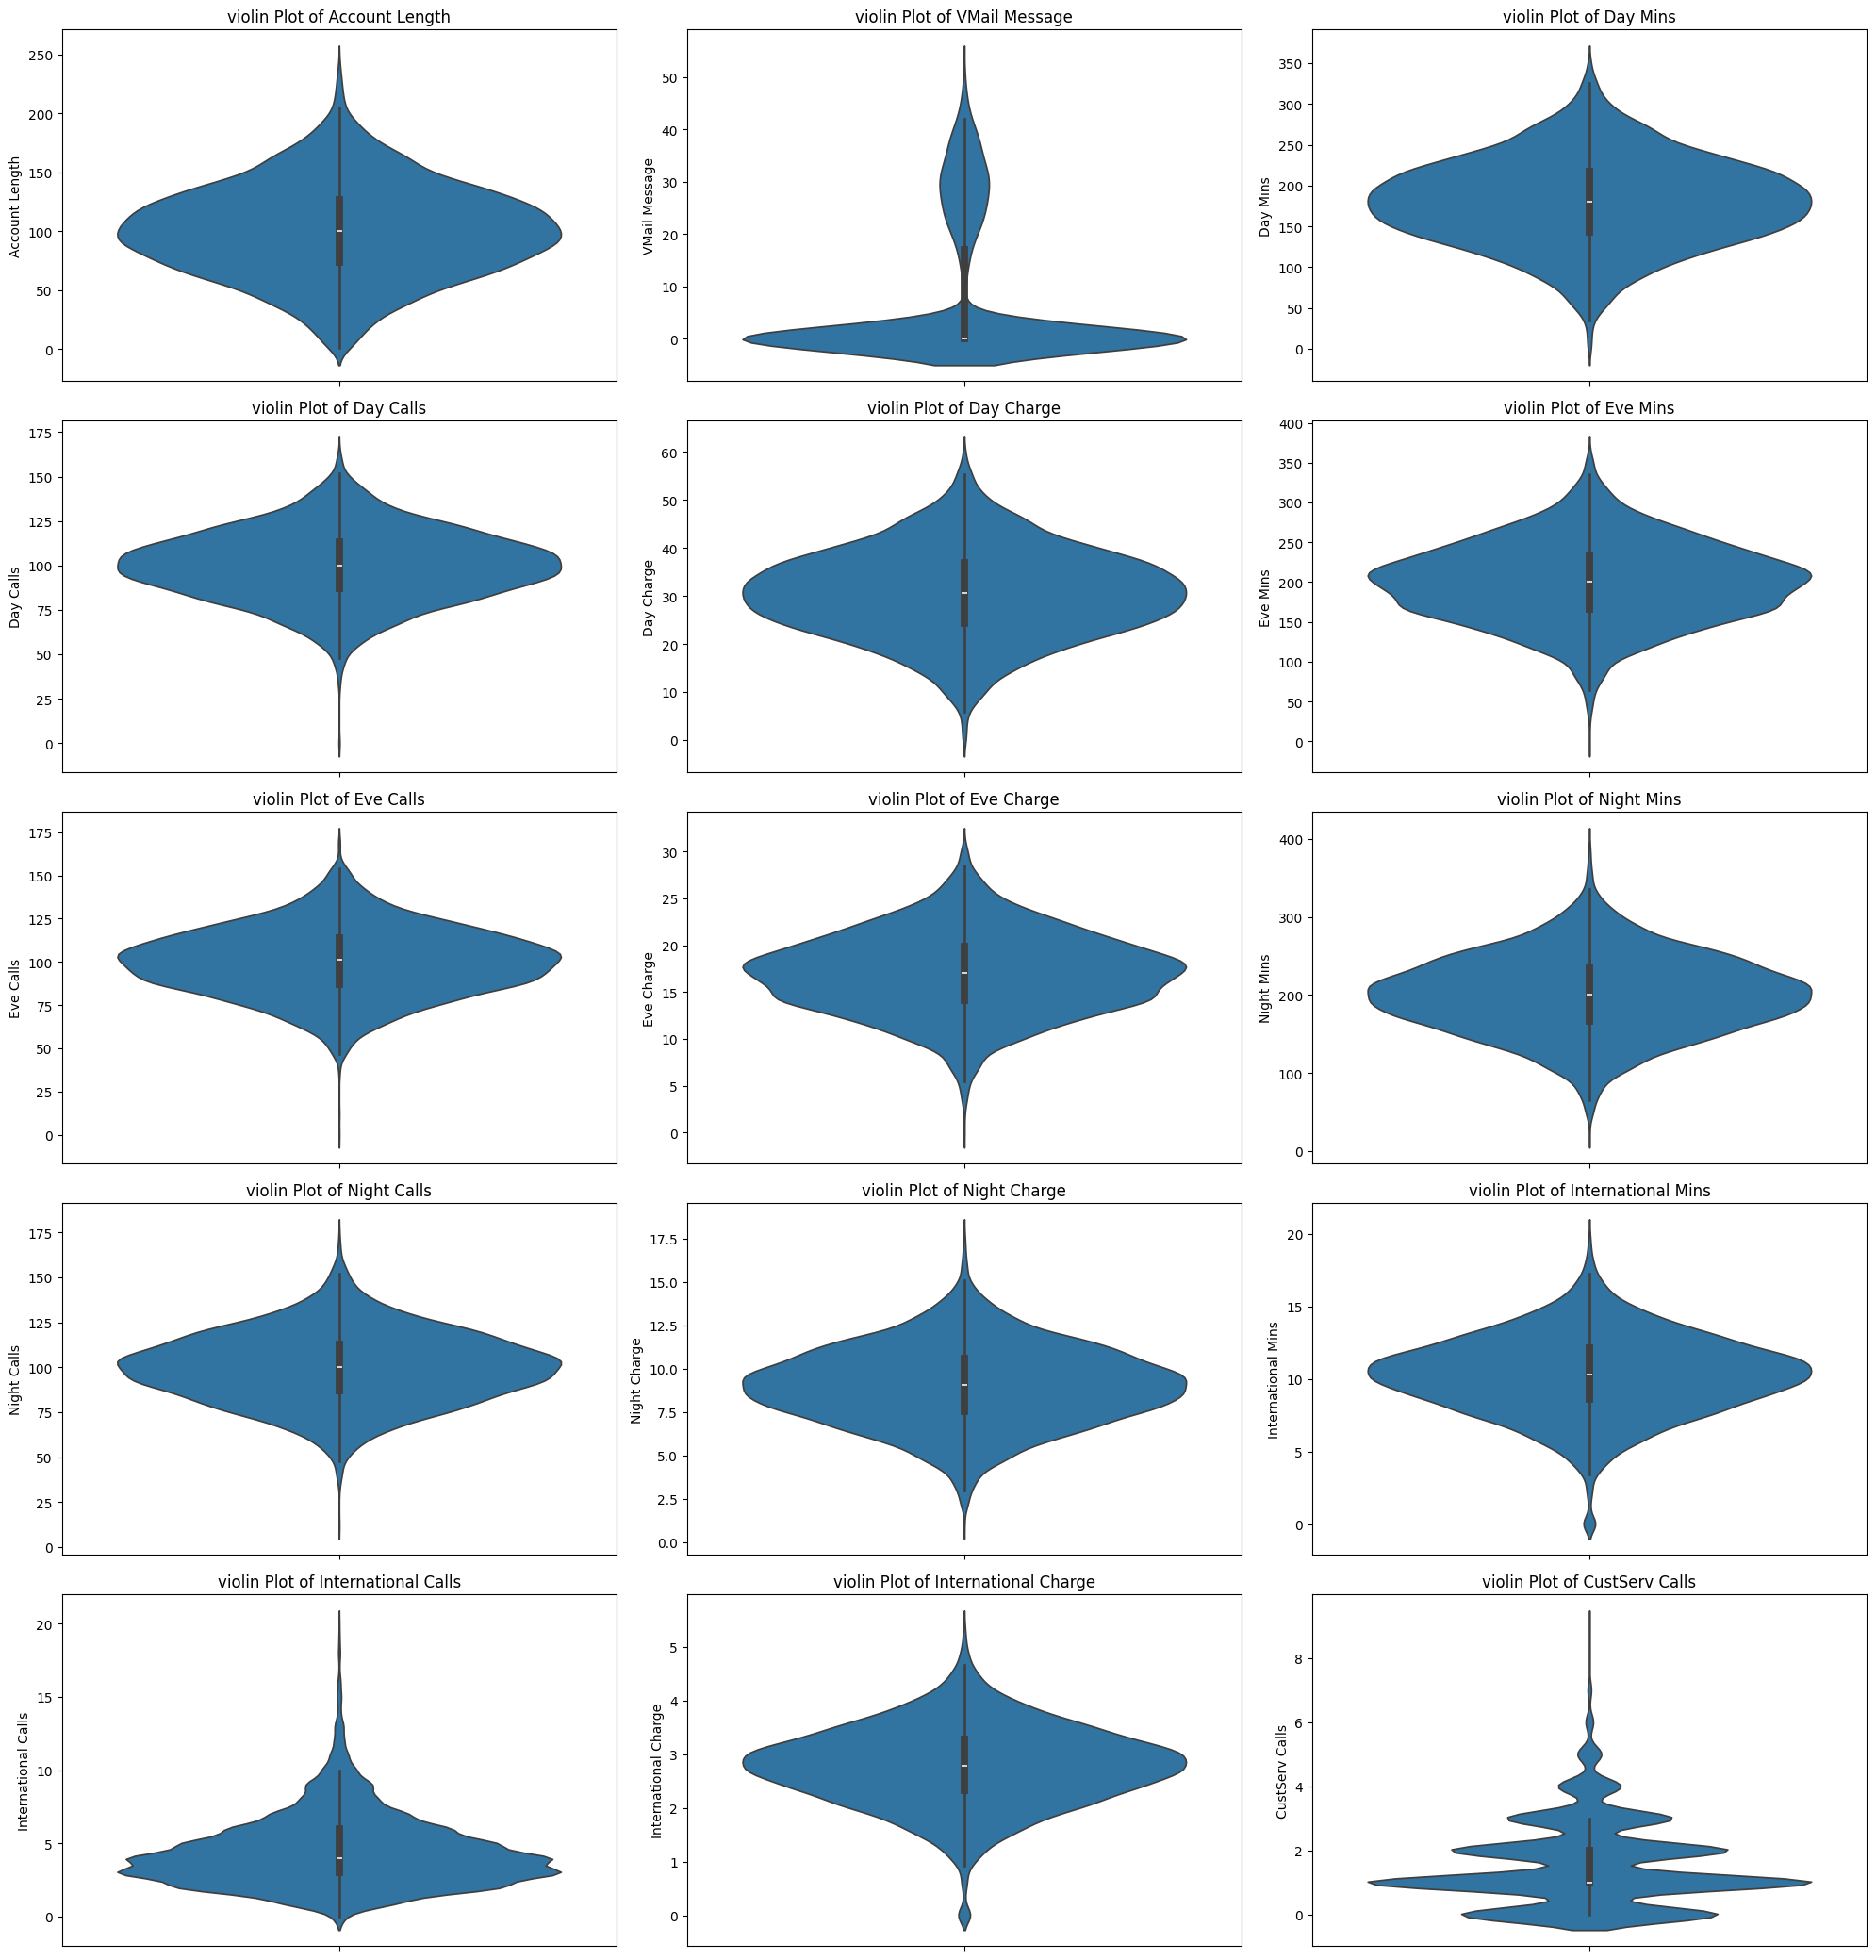

In [16]:
# violin plots for numerical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.violinplot(y=df[col])
    plt.title(f'violin Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Univariate Analysis for Categorical Columns

For categorical columns, I will use count plots to visualize the frequency of each category. I will exclude 'Phone' from this analysis as it contains too many unique values for a meaningful plot.

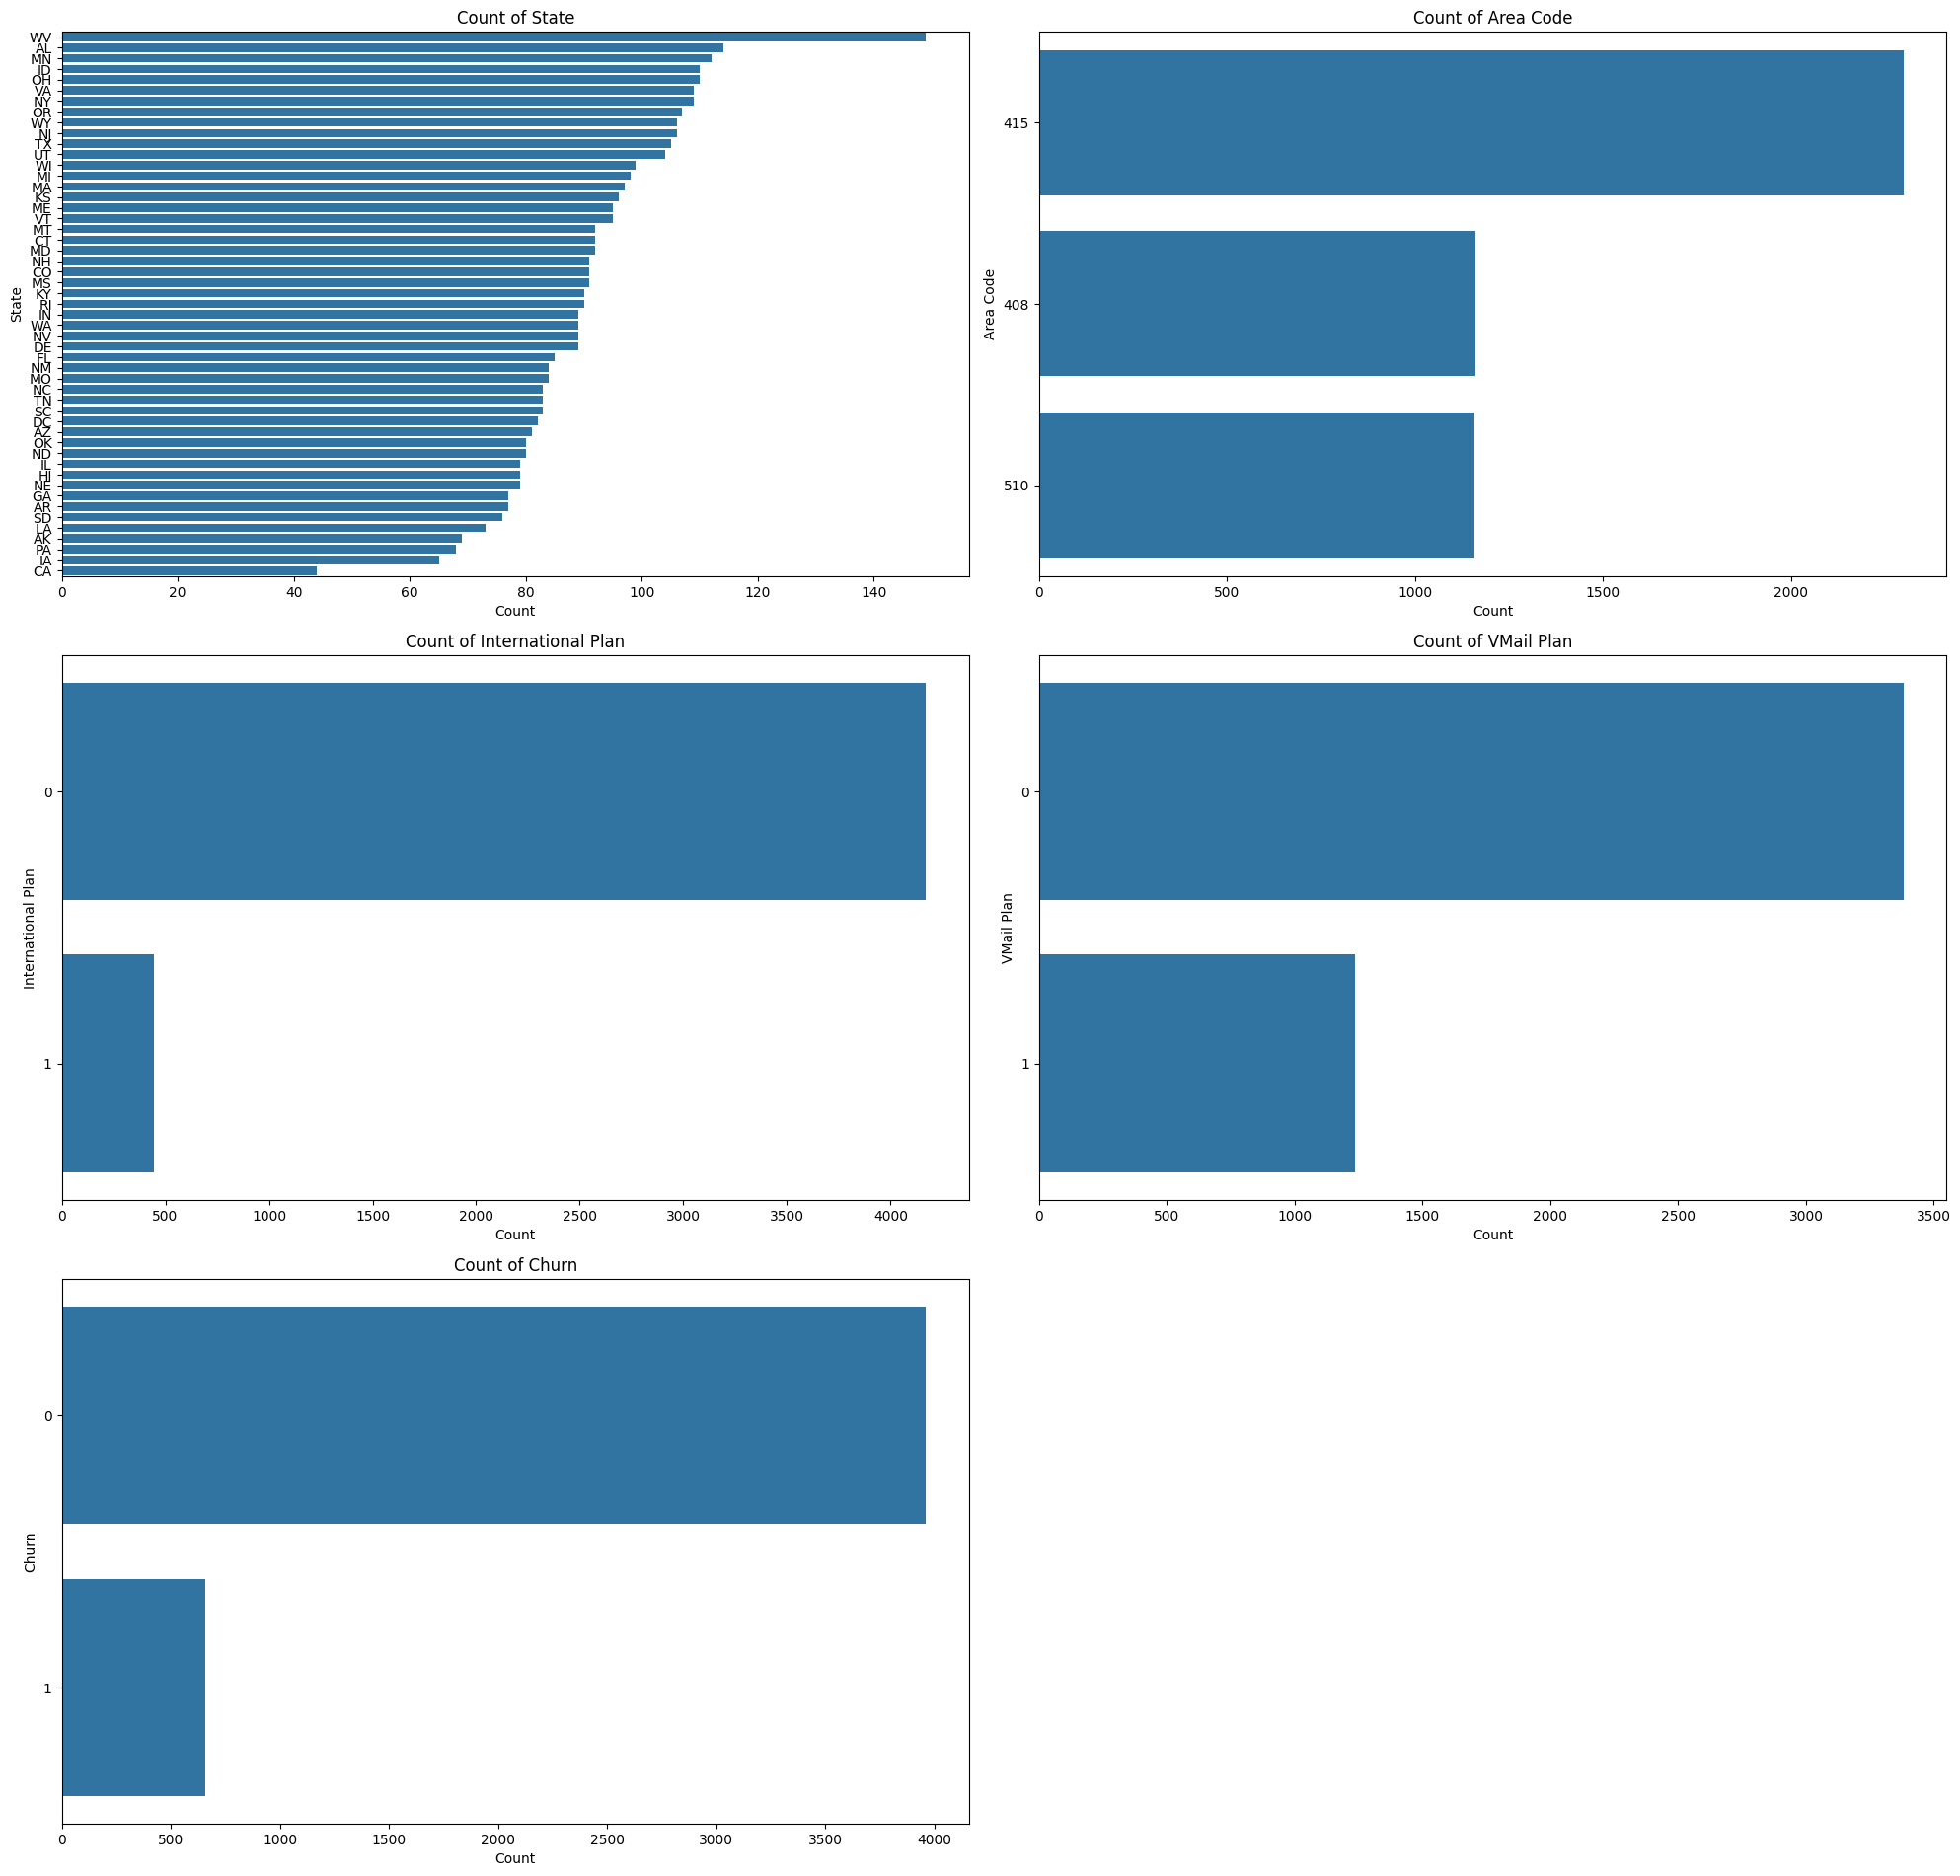

In [17]:
# Count plots for categorical columns (excluding 'Phone')
plt.figure(figsize=(20, 25))
categorical_cols_to_plot = [col for col in categorical_cols if col != 'Phone']

for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical Features vs. Churn

To understand how numerical features relate to customer churn, I will use box plots. This will allow us to visualize the distribution of each numerical feature for both churned (1) and non-churned (0) customers, highlighting any potential differences in their central tendency and spread.

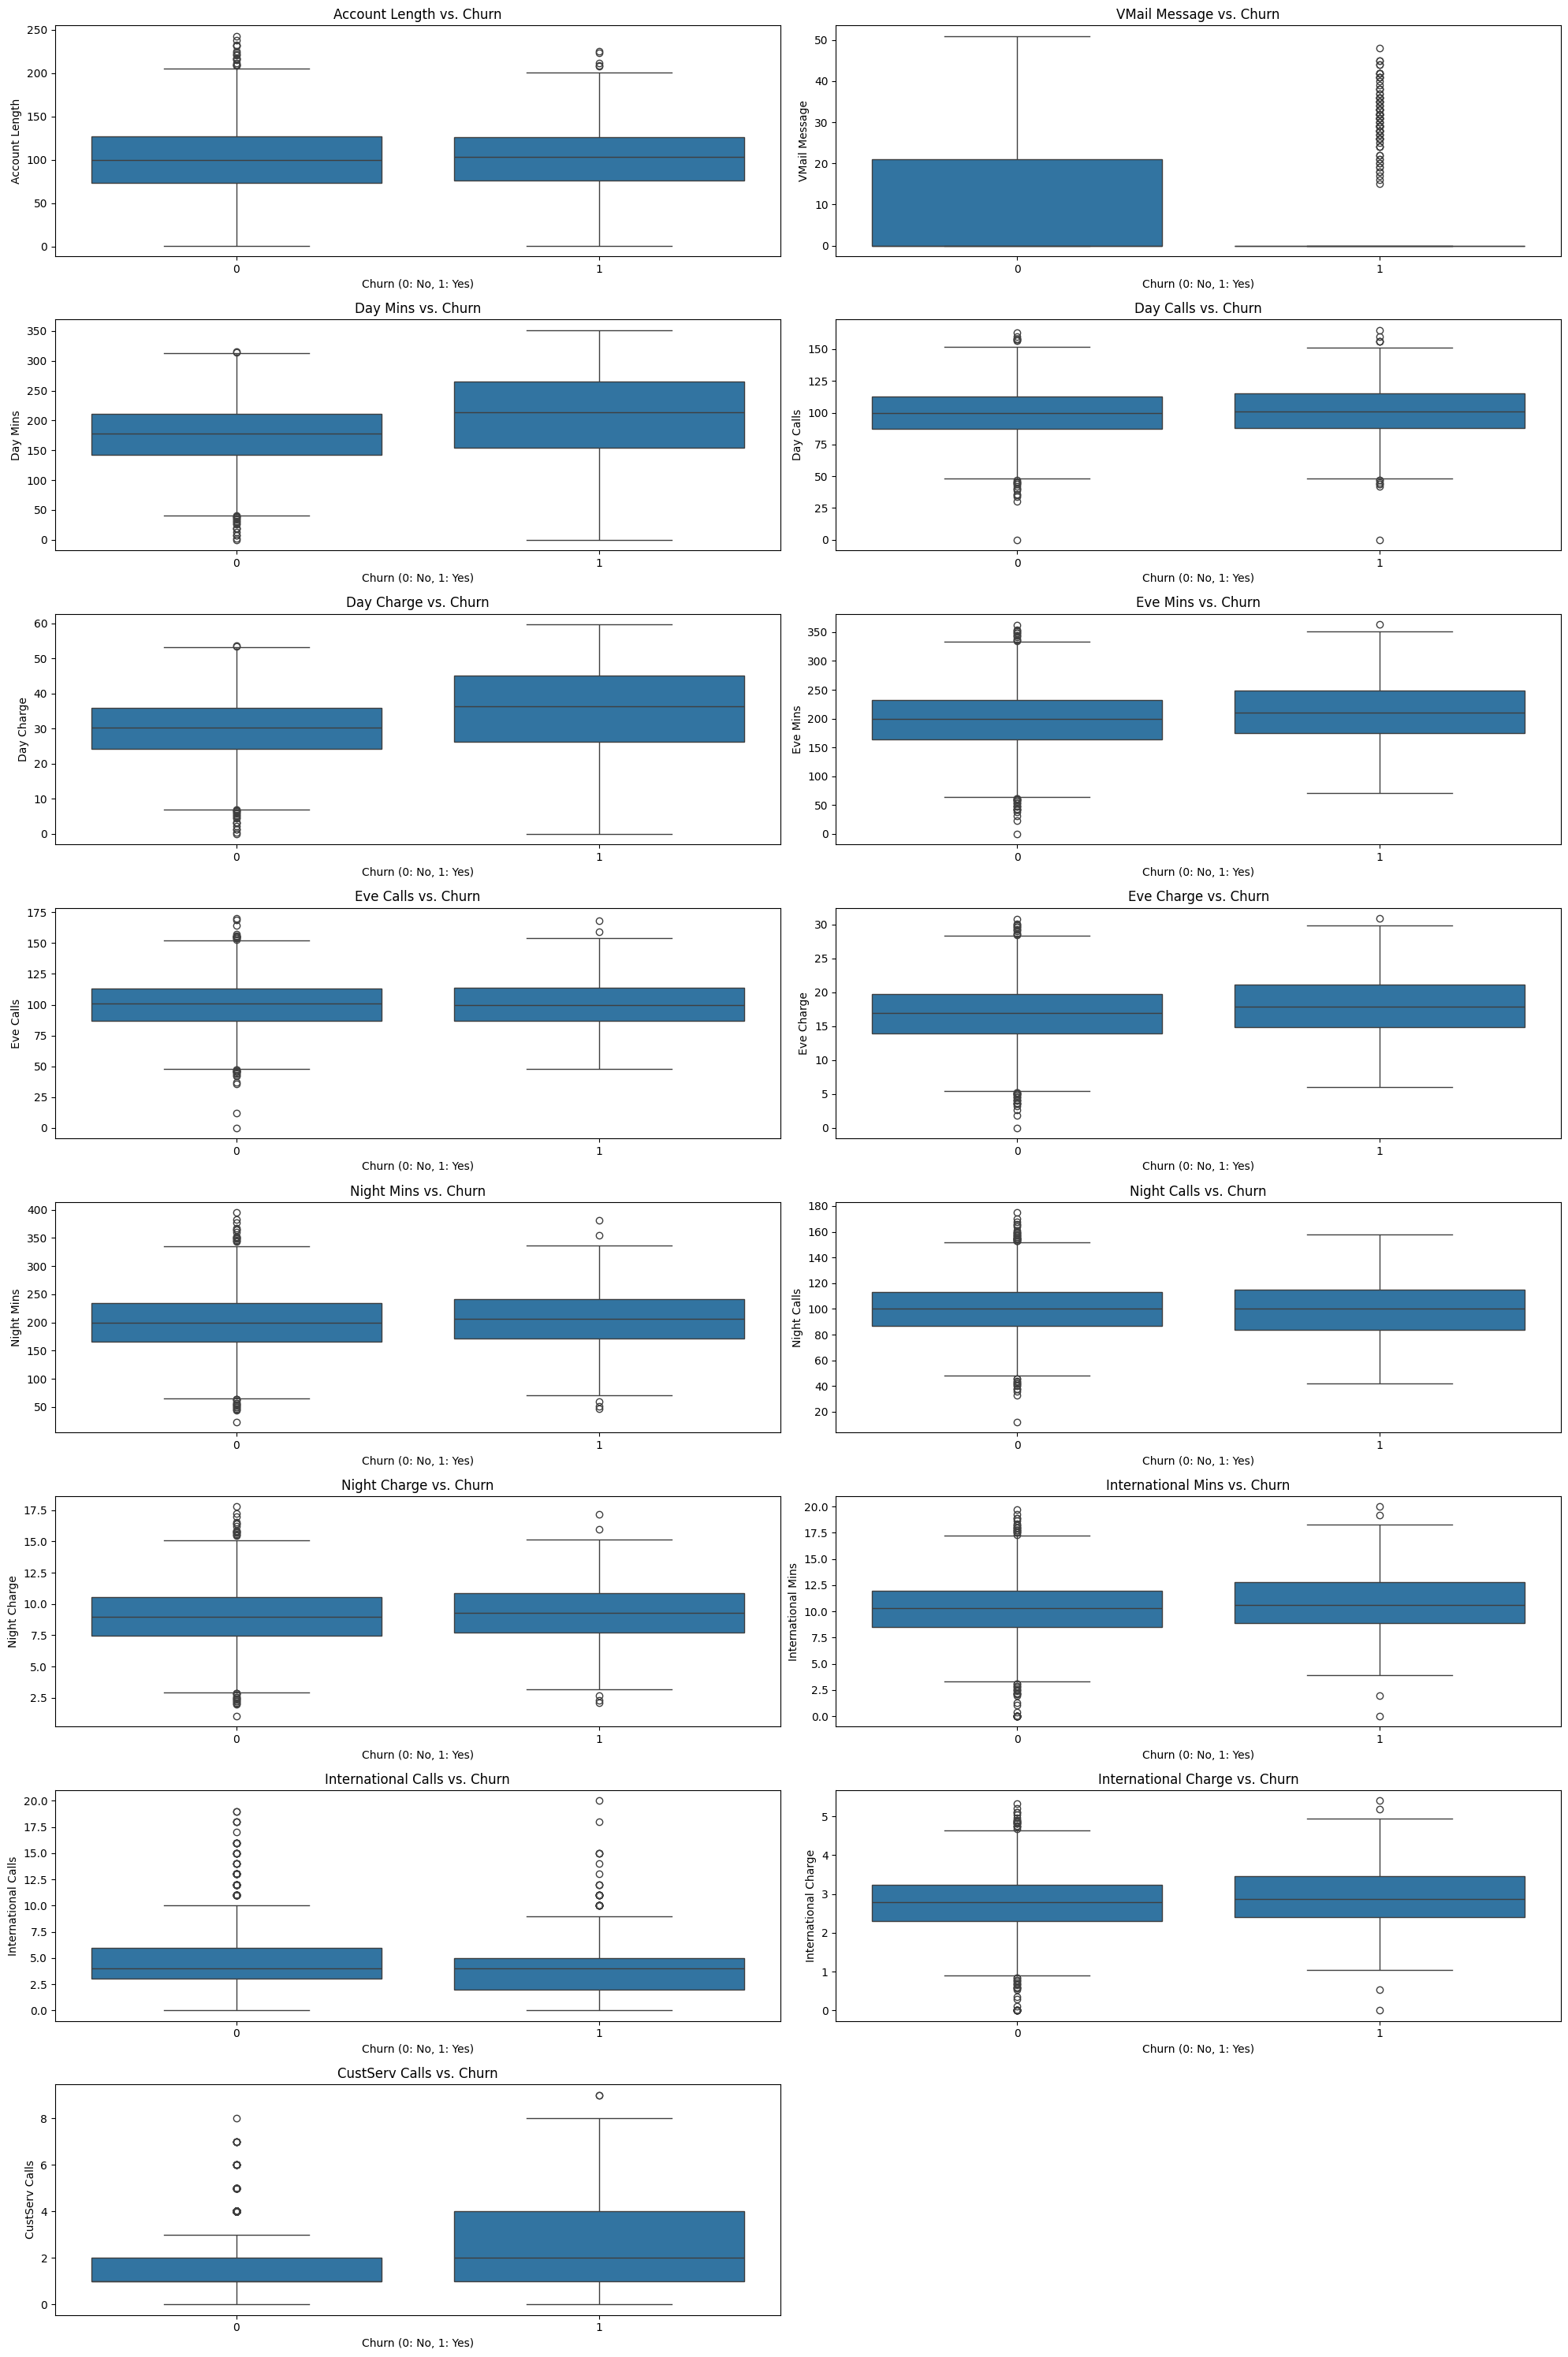

In [18]:
# Box plots of numerical features against Churn
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(8, 2, i + 1) # Adjust subplot grid based on number of numerical_cols
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Categorical Features vs. Churn

To understand the relationship between categorical features and customer churn, I will use count plots. These plots will display the distribution of 'Churn' (Yes/No) within each category of the selected features, allowing us to identify categorical groups that exhibit higher churn rates.

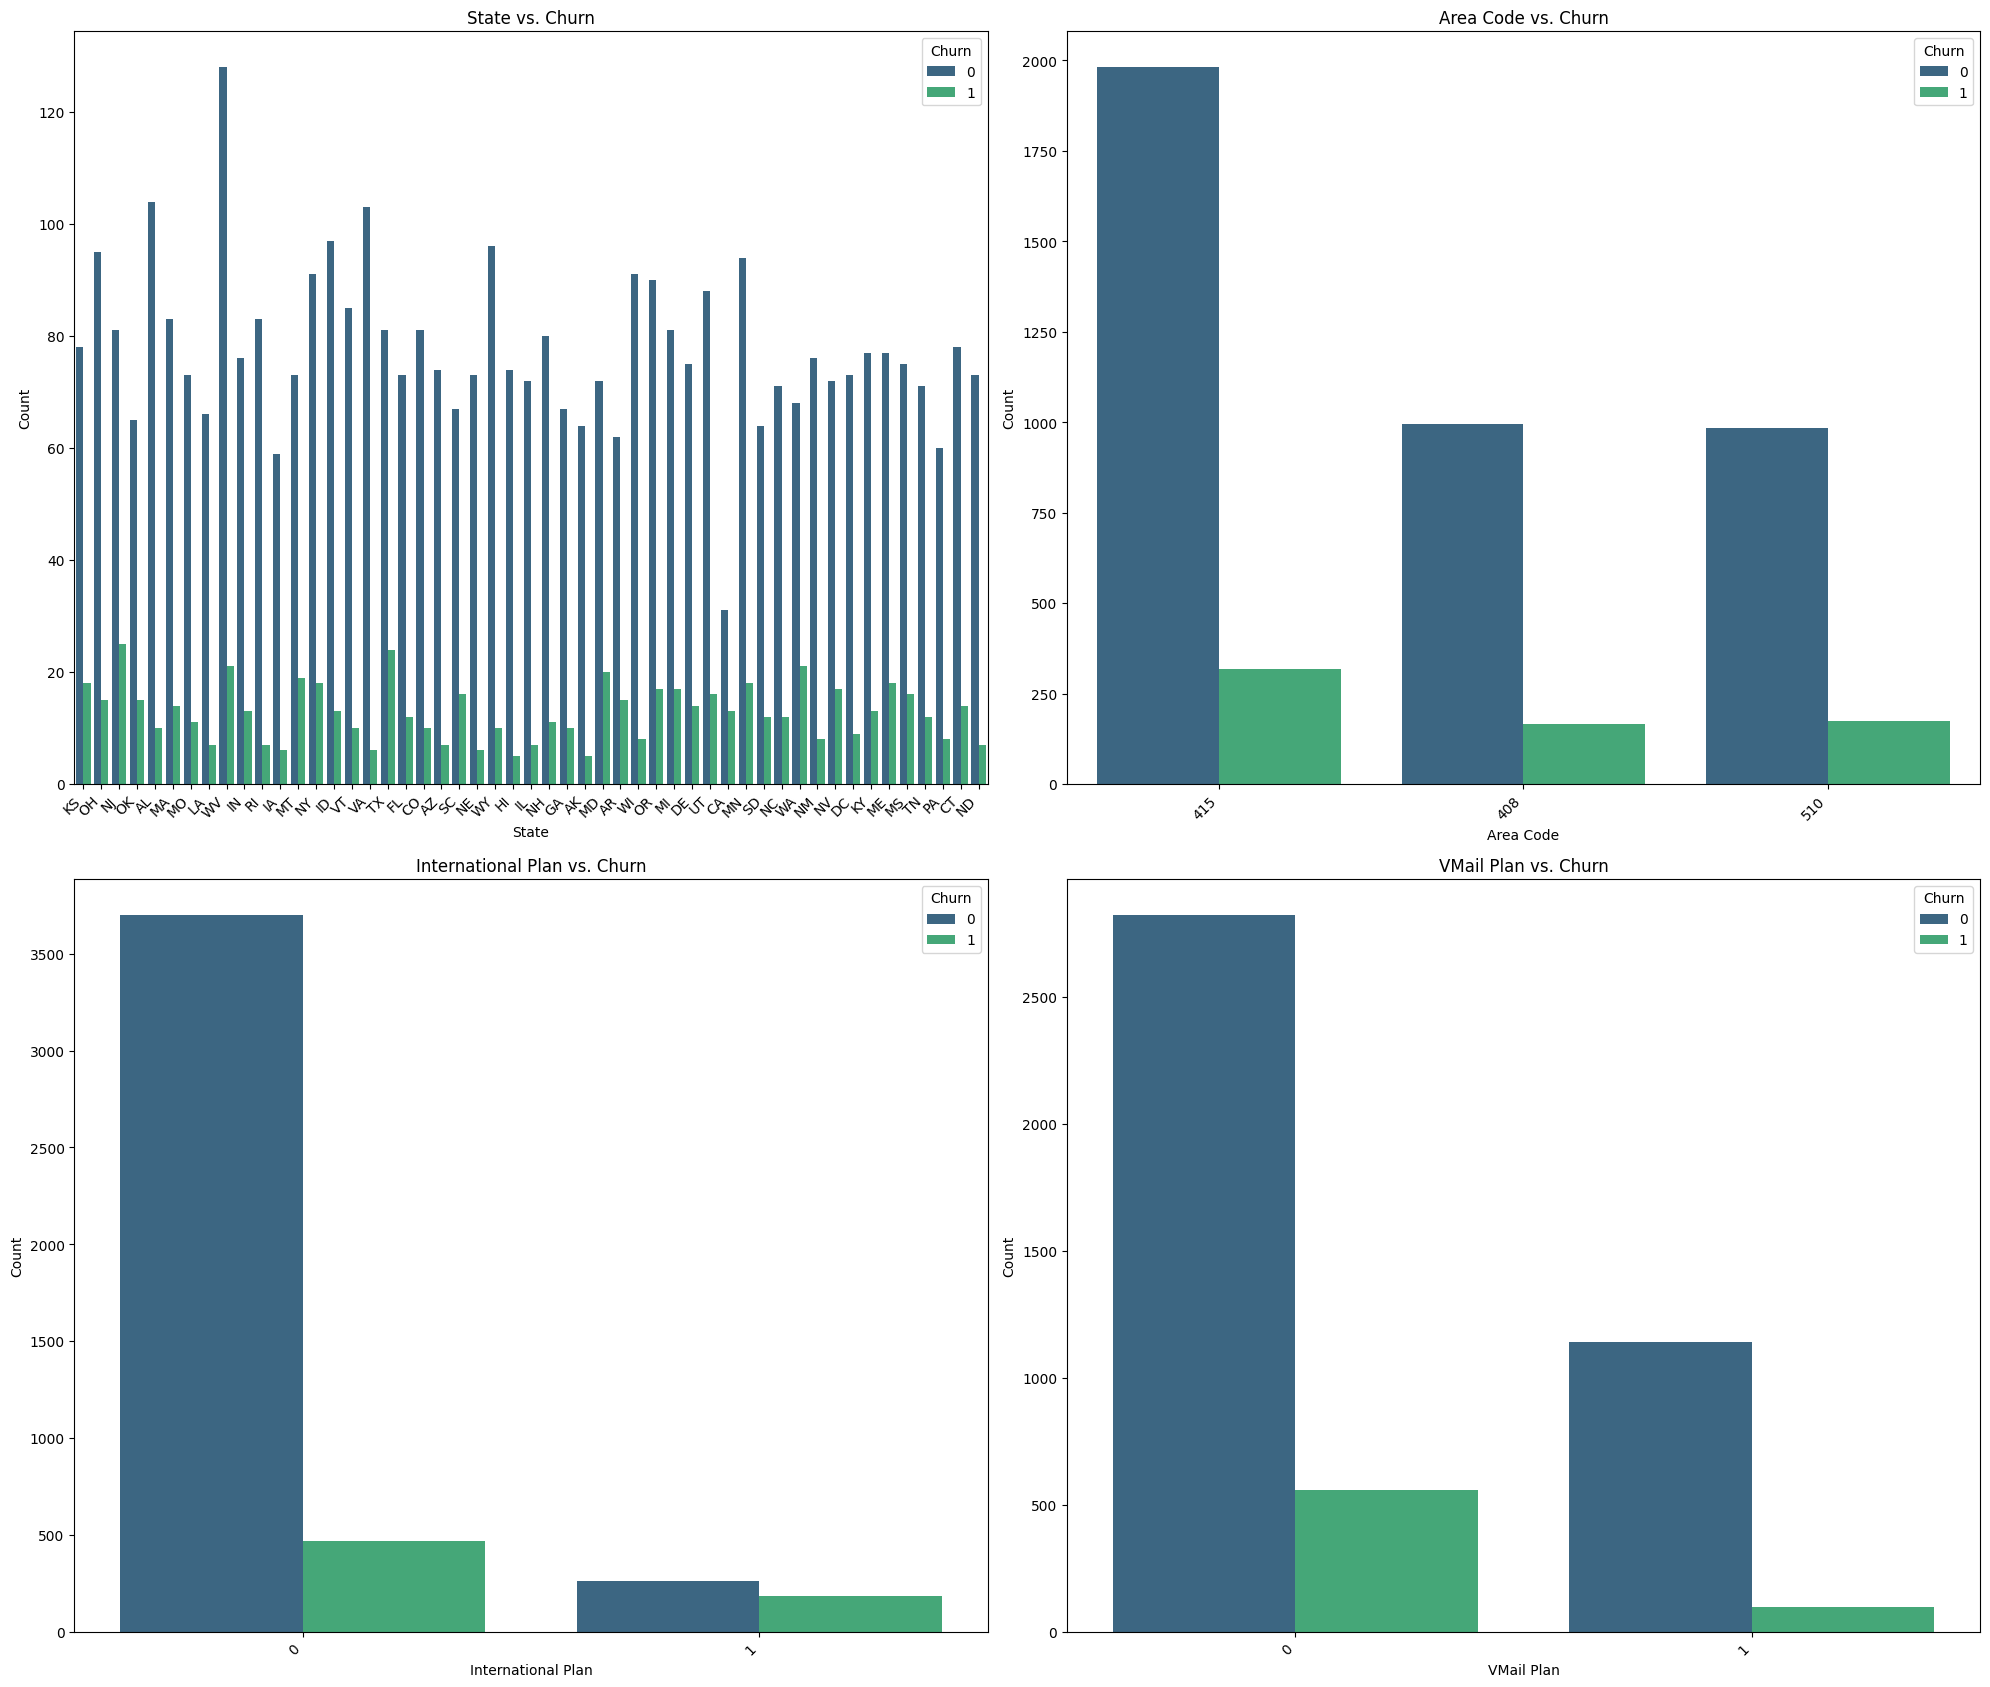

In [19]:
plt.figure(figsize=(20, 25))
categorical_cols_for_bivariate = [col for col in categorical_cols if col not in ['Phone', 'Churn']]

for i, col in enumerate(categorical_cols_for_bivariate):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'{col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Correlation Matrix and Heatmap for Numerical Features

To further understand the relationships between numerical features and identify potential predictors of churn, I will compute and visualize a correlation matrix. This will show the linear correlation coefficients between all numerical variables, including the 'Churn' variable. A heatmap will provide a visual representation of these correlations.

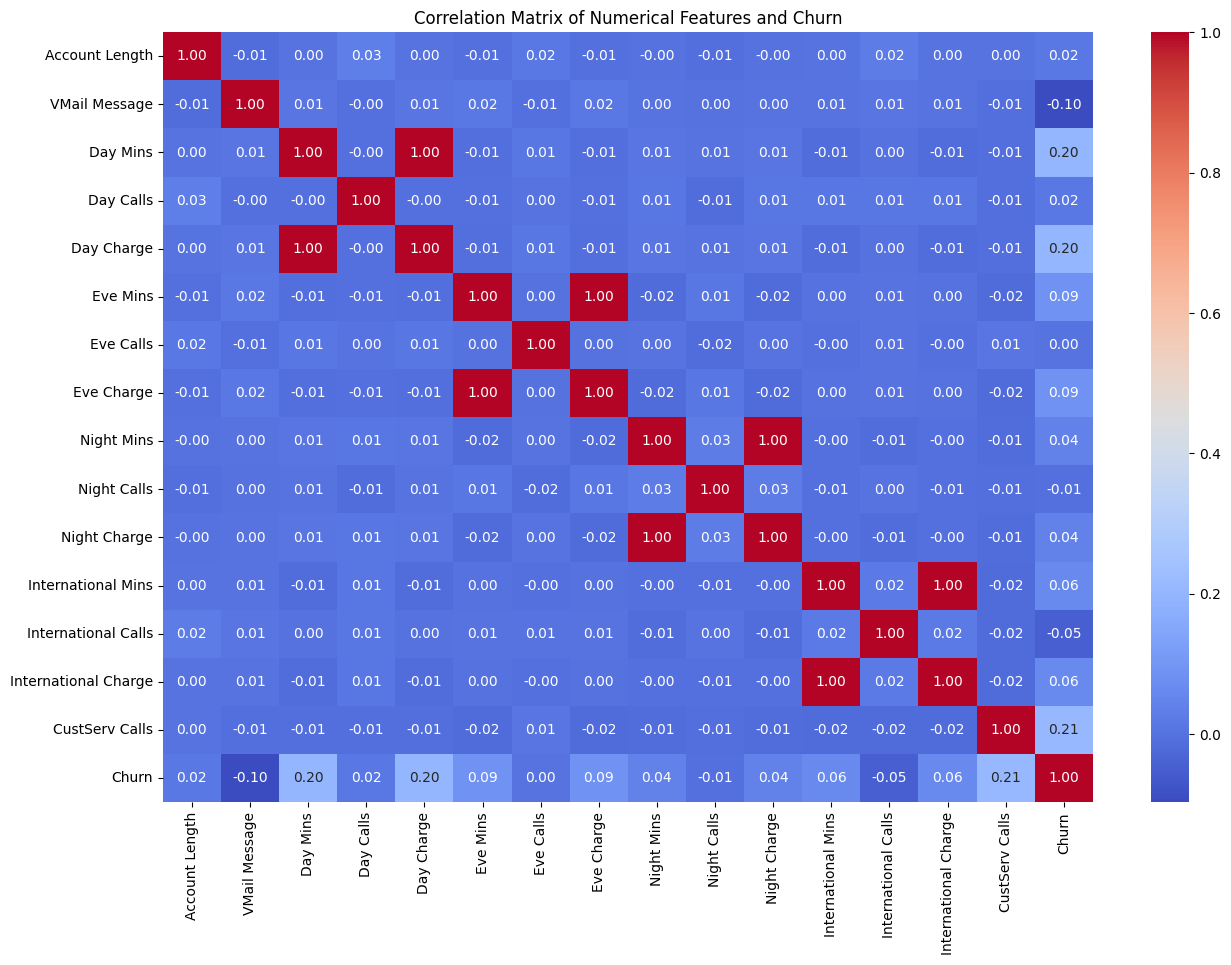

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

---
## Insights

***Redundant Features***: Day Mins ~ Day Charge, Eve Mins ~ Eve Charge, Night Mins ~ Night Charge, International Mins ~ International Charge: Perfect linear correlation ( r=1.00 r=1.00). Retain only one variable from each pair to prevent multicollinearity.

***Feature Independence***: Most other variables demonstrate low absolute correlation (∣r∣≈0.00−0.03 ∣r∣≈0.00−0.03), indicating high feature independence and minimal linear relationships. This supports robust model interpretability and reduces risk of multicollinearity.

***Calls vs. Usage***: Calls variables exhibit negligible correlation with corresponding Mins/Charge features, suggesting distributional differences in call frequency and duration, relevant for segmenting user behavior.

***Preprocessing Implication:***
Prior to model development, drop redundant charge/minutes pairs, check for non-linear relationships, and leverage regularization (if using linear models).

---
# Feature Engineering



In [21]:
# Create a copy of the dataframe for feature engineering
df_engineered = df.copy()

print("Original shape:", df_engineered.shape)
print("\n===Remove Redundant Features ===")
# Remove redundant charge columns (perfectly correlated with minutes)
redundant_cols = ['Day Charge', 'Eve Charge', 'Night Charge', 'International Charge']
df_engineered = df_engineered.drop(columns=redundant_cols)
print(f"Dropped columns: {redundant_cols}")
print(f"New shape: {df_engineered.shape}")

Original shape: (4617, 21)

===Remove Redundant Features ===
Dropped columns: ['Day Charge', 'Eve Charge', 'Night Charge', 'International Charge']
New shape: (4617, 17)


In [22]:

# Total usage across all periods
df_engineered['Total Mins'] = (df_engineered['Day Mins'] +
                                df_engineered['Eve Mins'] +
                                df_engineered['Night Mins'] +
                                df_engineered['International Mins'])

df_engineered['Total Calls'] = (df_engineered['Day Calls'] +
                                 df_engineered['Eve Calls'] +
                                 df_engineered['Night Calls'] +
                                 df_engineered['International Calls'])

print(f"Created: Total Mins, Total Calls")
print(f"Total Mins range: {df_engineered['Total Mins'].min():.2f} - {df_engineered['Total Mins'].max():.2f}")
print(f"Total Calls range: {df_engineered['Total Calls'].min()} - {df_engineered['Total Calls'].max()}")

Created: Total Mins, Total Calls
Total Mins range: 284.30 - 885.00
Total Calls range: 191 - 416


In [23]:

# Average minutes per call for each period (handle division by zero)
for period in ['Day', 'Eve', 'Night', 'International']:
    mins_col = f'{period} Mins'
    calls_col = f'{period} Calls'
    avg_col = f'Avg {period} Call Duration'

    # Use where to avoid division by zero
    df_engineered[avg_col] = df_engineered[mins_col] / df_engineered[calls_col].replace(0, 1)
    df_engineered.loc[df_engineered[calls_col] == 0, avg_col] = 0

    print(f"Created: {avg_col} - Mean: {df_engineered[avg_col].mean():.2f} mins")

# Overall average call duration
df_engineered['Avg Call Duration'] = df_engineered['Total Mins'] / df_engineered['Total Calls']
print(f"Created: Avg Call Duration - Mean: {df_engineered['Avg Call Duration'].mean():.2f} mins")

Created: Avg Day Call Duration - Mean: 1.89 mins
Created: Avg Eve Call Duration - Mean: 2.09 mins
Created: Avg Night Call Duration - Mean: 2.10 mins
Created: Avg International Call Duration - Mean: 3.16 mins
Created: Avg Call Duration - Mean: 1.97 mins


In [24]:

# Customer service calls ratio (important churn indicator)
df_engineered['CustServ Calls Ratio'] = df_engineered['CustServ Calls'] / df_engineered['Total Calls']
print(f"Created: CustServ Calls Ratio - Mean: {df_engineered['CustServ Calls Ratio'].mean():.4f}")

# International usage ratio
df_engineered['International Mins Ratio'] = df_engineered['International Mins'] / df_engineered['Total Mins']
df_engineered['International Calls Ratio'] = df_engineered['International Calls'] / df_engineered['Total Calls']
print(f"Created: International Mins Ratio - Mean: {df_engineered['International Mins Ratio'].mean():.4f}")
print(f"Created: International Calls Ratio - Mean: {df_engineered['International Calls Ratio'].mean():.4f}")

# VMail usage ratio (for those with VMail plan)
df_engineered['VMail Message Ratio'] = df_engineered['VMail Message'] / (df_engineered['VMail Message'].max() + 1)
print(f"Created: VMail Message Ratio - Mean: {df_engineered['VMail Message Ratio'].mean():.4f}")

Created: CustServ Calls Ratio - Mean: 0.0052
Created: International Mins Ratio - Mean: 0.0178
Created: International Calls Ratio - Mean: 0.0147
Created: VMail Message Ratio - Mean: 0.1510


In [25]:

# Flag customers with unusually high values (above 90th percentile)
df_engineered['High CustServ Calls'] = (df_engineered['CustServ Calls'] > df_engineered['CustServ Calls'].quantile(0.90)).astype(int)
df_engineered['High Total Mins'] = (df_engineered['Total Mins'] > df_engineered['Total Mins'].quantile(0.90)).astype(int)
df_engineered['High Total Calls'] = (df_engineered['Total Calls'] > df_engineered['Total Calls'].quantile(0.90)).astype(int)

print(f"High CustServ Calls: {df_engineered['High CustServ Calls'].sum()} customers ({df_engineered['High CustServ Calls'].mean()*100:.1f}%)")
print(f"High Total Mins: {df_engineered['High Total Mins'].sum()} customers ({df_engineered['High Total Mins'].mean()*100:.1f}%)")
print(f"High Total Calls: {df_engineered['High Total Calls'].sum()} customers ({df_engineered['High Total Calls'].mean()*100:.1f}%)")

High CustServ Calls: 368 customers (8.0%)
High Total Mins: 462 customers (10.0%)
High Total Calls: 445 customers (9.6%)


In [26]:

# Bin account length into categories
df_engineered['Tenure Category'] = pd.cut(df_engineered['Account Length'],
                                           bins=[0, 50, 100, 150, 200, 250],
                                           labels=['Very New', 'New', 'Medium', 'Long', 'Very Long'])

print("Tenure Category distribution:")
print(df_engineered['Tenure Category'].value_counts().sort_index())

# Convert to numeric for modeling
tenure_mapping = {'Very New': 0, 'New': 1, 'Medium': 2, 'Long': 3, 'Very Long': 4}
df_engineered['Tenure Category Numeric'] = df_engineered['Tenure Category'].map(tenure_mapping)
print("\nCreated: Tenure Category, Tenure Category Numeric")

Tenure Category distribution:
Tenure Category
Very New      475
New          1849
Medium       1810
Long          451
Very Long      32
Name: count, dtype: int64

Created: Tenure Category, Tenure Category Numeric


In [27]:

# Remove Phone as it's a unique identifier with no predictive power
if 'Phone' in df_engineered.columns:
    df_engineered = df_engineered.drop(columns=['Phone'])
    print("Dropped: Phone")

# Also drop the categorical version of Tenure (keep numeric)
if 'Tenure Category' in df_engineered.columns:
    df_engineered = df_engineered.drop(columns=['Tenure Category'])
    print("Dropped: Tenure Category (kept numeric version)")

print(f"\nFinal shape: {df_engineered.shape}")
print(f"Features added: {df_engineered.shape[1] - df.shape[1] + 4}")


print("\n=== Feature Engineering Summary ===")
print(f" Removed {4} redundant charge features")
print(f" Created {2} aggregate features (Total Mins, Total Calls)")
print(f" Created {5} average duration features")
print(f" Created {4} ratio features")
print(f" Created {3} high activity flags")
print(f" Created {1} tenure category feature")
print(f" Removed {2} identifier/categorical columns")
print(f"\nTotal new features created: {15}")

Dropped: Phone
Dropped: Tenure Category (kept numeric version)

Final shape: (4617, 31)
Features added: 14

=== Feature Engineering Summary ===
 Removed 4 redundant charge features
 Created 2 aggregate features (Total Mins, Total Calls)
 Created 5 average duration features
 Created 4 ratio features
 Created 3 high activity flags
 Created 1 tenure category feature
 Removed 2 identifier/categorical columns

Total new features created: 15


In [45]:
# Display the engineered dataframe info
print("\n=== Engineered DataFrame Info ===")
print(f"Shape: {df_engineered.shape}")
print(f"\nColumn List ({len(df_engineered.columns)} features):")
for i, col in enumerate(df_engineered.columns, 1):
    print(f"{i:2d}. {col}")




=== Engineered DataFrame Info ===
Shape: (4617, 31)

Column List (31 features):
 1. State
 2. Account Length
 3. Area Code
 4. International Plan
 5. VMail Plan
 6. VMail Message
 7. Day Mins
 8. Day Calls
 9. Eve Mins
10. Eve Calls
11. Night Mins
12. Night Calls
13. International Mins
14. International Calls
15. CustServ Calls
16. Churn
17. Total Mins
18. Total Calls
19. Avg Day Call Duration
20. Avg Eve Call Duration
21. Avg Night Call Duration
22. Avg International Call Duration
23. Avg Call Duration
24. CustServ Calls Ratio
25. International Mins Ratio
26. International Calls Ratio
27. VMail Message Ratio
28. High CustServ Calls
29. High Total Mins
30. High Total Calls
31. Tenure Category Numeric


In [46]:
print("\n=== Sample of Engineered Features ===")
df_engineered.head()


=== Sample of Engineered Features ===


,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,...,Avg International Call Duration,Avg Call Duration,CustServ Calls Ratio,International Mins Ratio,International Calls Ratio,VMail Message Ratio,High CustServ Calls,High Total Mins,High Total Calls,Tenure Category Numeric
0,KS,128,415,0,1,25,265.1,110,197.4,99,...,3.333333,2.366997,0.003300,0.013943,0.009901,0.480769,0,1,0,2
1,OH,107,415,0,1,26,161.6,123,195.5,103,...,4.566667,1.883133,0.003012,0.021913,0.009036,0.500000,0,0,0,2
2,NJ,137,415,0,0,0,243.4,114,121.2,110,...,2.440000,1.619820,0.000000,0.022618,0.015015,0.000000,0,0,0,2
3,OH,84,408,1,0,0,299.4,71,61.9,88,...,0.942857,2.214902,0.007843,0.011686,0.027451,0.000000,0,0,0,1
4,OK,75,415,1,0,0,166.7,113,148.3,122,...,3.366667,1.426184,0.008357,0.019727,0.008357,0.000000,0,0,1,1




---
# Outlier Detection


In [29]:
print("Outlier Detection Summary:")
print("-" * 70)
print(f"{'Feature':<35} {'Outliers':<10} {'% of Data':<12} {'Range'}")
print("-" * 70)

outlier_summary = {}

# Update numerical_cols to reflect the current numerical columns in df_engineered
# Exclude binary and ordinal encoded categorical columns as IQR-based outlier detection is not meaningful for them
numerical_cols_for_outliers = df_engineered.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove binary/ordinal encoded columns and the target variable 'Churn'
excluded_from_outliers = [
    'Churn', 'International Plan', 'VMail Plan',
    'High CustServ Calls', 'High Total Mins', 'High Total Calls',
    'Tenure Category Numeric'
]

numerical_cols_for_outliers = [col for col in numerical_cols_for_outliers if col not in excluded_from_outliers]

for col in numerical_cols_for_outliers:
    Q1 = df_engineered[col].quantile(0.25)
    Q3 = df_engineered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_engineered[(df_engineered[col] < lower_bound) | (df_engineered[col] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df_engineered)) * 100

    outlier_summary[col] = {
        'count': n_outliers,
        'percentage': pct_outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    range_str = f"[{lower_bound:.1f}, {upper_bound:.1f}]"
    print(f"{col:<35} {n_outliers:<10} {pct_outliers:<11.2f}% {range_str}")

print("-" * 70)

Outlier Detection Summary:
----------------------------------------------------------------------
Feature                             Outliers   % of Data    Range
----------------------------------------------------------------------
Account Length                      23         0.50       % [-5.5, 206.5]
VMail Message                       51         1.10       % [-25.5, 42.5]
Day Mins                            27         0.58       % [34.0, 326.5]
Day Calls                           34         0.74       % [48.0, 152.0]
Eve Mins                            36         0.78       % [63.8, 336.1]
Eve Calls                           25         0.54       % [46.5, 154.5]
Night Mins                          36         0.78       % [65.4, 336.6]
Night Calls                         42         0.91       % [48.0, 152.0]
International Mins                  65         1.41       % [3.3, 17.4]
International Calls                 107        2.32       % [-1.5, 10.5]
CustServ Calls              

---
# Capping Outliers

In [47]:
# Create a version with capped outliers (Winsorization)
df_capped = df_engineered.copy()
print("Capping outliers to IQR bounds for selected features...\n")

# Features to cap (exclude CustServ Calls as outliers are meaningful for churn)
features_to_cap = ['VMail Message', 'Day Calls', 'Eve Calls', 'Night Calls',
                   'International Calls', 'Total Calls']

capped_count = 0
for col in features_to_cap:
    if col in outlier_summary:
        lower = outlier_summary[col]['lower_bound']
        upper = outlier_summary[col]['upper_bound']

        # Cap the values
        before = df_capped[col].copy()
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)

        n_capped = (before != df_capped[col]).sum()
        capped_count += n_capped

        if n_capped > 0:
            print(f"  {col}: Capped {n_capped} values to range [{lower:.1f}, {upper:.1f}]")

print(f"\nTotal values capped: {capped_count}")

Capping outliers to IQR bounds for selected features...

  VMail Message: Capped 51 values to range [-25.5, 42.5]
  Day Calls: Capped 34 values to range [48.0, 152.0]
  Eve Calls: Capped 25 values to range [46.5, 154.5]
  Night Calls: Capped 42 values to range [48.0, 152.0]
  International Calls: Capped 107 values to range [-1.5, 10.5]
  Total Calls: Capped 25 values to range [213.0, 397.0]

Total values capped: 284


In [31]:
print(f"Engineered Shape: {df_engineered.shape}")
print(f"Capped Shape: {df_capped.shape}")


Engineered Shape: (4617, 31)
Capped Shape: (4617, 31)




---
# Data Preprocessing
###Step 1: Encode categorical variables (State and Area Code)



In [48]:



print("Encoding categorical variables...")

# Encode 'State' using one-hot encoding
state_encoded = pd.get_dummies(df_capped['State'], prefix='State', drop_first=True)

# Encode 'Area Code' as it has only 3 unique values
area_code_encoded = pd.get_dummies(df_capped['Area Code'], prefix='AreaCode', drop_first=True)

# Drop original categorical columns and add encoded ones
df_processed = df_capped.drop(columns=['State', 'Area Code'])
df_processed = pd.concat([df_processed, state_encoded, area_code_encoded], axis=1)

print(f"Shape after encoding: {df_processed.shape}")
print(f"Total features: {df_processed.shape[1] - 1} (excluding target 'Churn')")
print("\nEncoding completed!")
df_processed.head()

Encoding categorical variables...
Shape after encoding: (4617, 81)
Total features: 80 (excluding target 'Churn')

Encoding completed!


,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,AreaCode_415,AreaCode_510
0,128,0,1,25.0,265.1,110,197.4,99.0,244.7,91,...,False,False,False,False,False,False,False,False,True,False
1,107,0,1,26.0,161.6,123,195.5,103.0,254.4,103,...,False,False,False,False,False,False,False,False,True,False
2,137,0,0,0.0,243.4,114,121.2,110.0,162.6,104,...,False,False,False,False,False,False,False,False,True,False
3,84,1,0,0.0,299.4,71,61.9,88.0,196.9,89,...,False,False,False,False,False,False,False,False,False,False
4,75,1,0,0.0,166.7,113,148.3,122.0,186.9,121,...,False,False,False,False,False,False,False,False,True,False




---
### Step 2: Separate features and target variable


In [50]:


# Separate X (features) and y (target)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nChurn rate: {(y.sum() / len(y)) * 100:.2f}%")

Features (X) shape: (4617, 80)
Target (y) shape: (4617,)

Target distribution:
Churn
0    3961
1     656
Name: count, dtype: int64

Churn rate: 14.21%


---
### Step 3: Split data into train and test sets

In [51]:

from sklearn.model_selection import train_test_split



# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTrain set churn rate: {(y_train.sum() / len(y_train)) * 100:.2f}%")
print(f"Test set churn rate: {(y_test.sum() / len(y_test)) * 100:.2f}%")


Train set size: 3693 samples
Test set size: 924 samples

Train set churn rate: 14.22%
Test set churn rate: 14.18%


---
### Step 4: Scale the features using StandardScaler

In [52]:

from sklearn.preprocessing import StandardScaler

# Create scaler and fit on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling completed!")
print(f"Train set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print("\nData is now ready for model training!")


Scaling completed!
Train set shape: (3693, 80)
Test set shape: (924, 80)

Data is now ready for model training!




---
# Saving clean dataset in csv file


In [42]:
df_processed.to_csv('telecom_churn_cleaned.csv', index=False)
print("Cleaned dataset saved to 'telecom_churn_cleaned.csv'")

Cleaned dataset saved to 'telecom_churn_cleaned.csv'


---
# MODEL BUILDING AND TRAINING


## We will train 3 simple models:
### 1. Logistic Regression - Simple and easy to understand
### 2. Decision Tree - Shows clear rules for churn prediction
### 3. Random Forest - More powerful, combines multiple decision trees

In [44]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


---
## Model 1: Logistic Regression

In [54]:

print("MODEL 1: LOGISTIC REGRESSION")

# Create and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy: {accuracy_lr * 100:.2f}%")

# Show detailed results
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nLogistic Regression training completed!")

MODEL 1: LOGISTIC REGRESSION

Accuracy: 87.88%

Detailed Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.96      0.93       793
       Churn       0.61      0.39      0.48       131

    accuracy                           0.88       924
   macro avg       0.76      0.67      0.70       924
weighted avg       0.86      0.88      0.87       924


Confusion Matrix:
[[761  32]
 [ 80  51]]

Logistic Regression training completed!


---
## Model 2: Decision Tree

In [55]:

print("MODEL 2: DECISION TREE")

# Create and train the model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt * 100:.2f}%")

# Show detailed results
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree training completed!")

MODEL 2: DECISION TREE

Accuracy: 93.18%

Detailed Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.96      0.96       793
       Churn       0.76      0.76      0.76       131

    accuracy                           0.93       924
   macro avg       0.86      0.86      0.86       924
weighted avg       0.93      0.93      0.93       924


Confusion Matrix:
[[762  31]
 [ 32  99]]

Decision Tree training completed!


---
## Model 3: Random Forest

In [56]:

print("MODEL 3: RANDOM FOREST")

random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
random_forest.fit(X_train_scaled, y_train)

y_pred_rf = random_forest.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf * 100:.2f}%")

print("\nDetailed Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest training completed!")

MODEL 3: RANDOM FOREST

Accuracy: 93.29%

Detailed Report:
              precision    recall  f1-score   support

    No Churn       0.93      0.99      0.96       793
       Churn       0.94      0.56      0.70       131

    accuracy                           0.93       924
   macro avg       0.93      0.78      0.83       924
weighted avg       0.93      0.93      0.93       924


Confusion Matrix:
[[788   5]
 [ 57  74]]

Random Forest training completed!


---
# Model Comparison

In [57]:
# Model Comparison
print("\nMODEL COMPARISON:")
print(f"Logistic Regression: {accuracy_lr*100:.2f}%")
print(f"Decision Tree: {accuracy_dt*100:.2f}%")
print(f"Random Forest: {accuracy_rf*100:.2f}% (BEST)")


MODEL COMPARISON:
Logistic Regression: 87.88%
Decision Tree: 93.18%
Random Forest: 93.29% (BEST)


---
## Best Model saved

In [64]:
import pickle

# Define the filename for your model
model_filename = 'random_forest_model.pkl'

# Save the trained Random Forest model
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest, file)

print(f"Random Forest model saved successfully to '{model_filename}'")

Random Forest model saved successfully to 'random_forest_model.pkl'


---

##Creating CHURN-FLAG for entire dataset using best model (Random Forest)

In [59]:
# Scale all data
X_all_scaled = scaler.transform(X)

In [60]:
# Predict using Random Forest (best model)
churn_predictions = random_forest.predict(X_all_scaled)

In [62]:

# Add CHURN-FLAG to original dataframe
df_final = df_capped.copy()
df_final['CHURN-FLAG'] = churn_predictions
df_final['CHURN-FLAG'] = df_final['CHURN-FLAG'].map({0: 'NO', 1: 'YES'})

print(f"\nCHURN-FLAG created successfully!")
print(f"\nTotal customers: {len(df_final)}")
print(f"Predicted to Churn (YES): {(df_final['CHURN-FLAG'] == 'YES').sum()}")
print(f"Predicted to Stay (NO): {(df_final['CHURN-FLAG'] == 'NO').sum()}")


CHURN-FLAG created successfully!

Total customers: 4617
Predicted to Churn (YES): 508
Predicted to Stay (NO): 4109


In [63]:
print("\nFirst 10 customers with CHURN-FLAG:")
df_final[['State', 'Account Length', 'International Plan', 'CustServ Calls', 'Churn', 'CHURN-FLAG']].head(10)


First 10 customers with CHURN-FLAG:


,State,Account Length,International Plan,CustServ Calls,Churn,CHURN-FLAG
0,KS,128,0,1,0,NO
1,OH,107,0,1,0,NO
2,NJ,137,0,0,0,NO
3,OH,84,1,2,0,NO
4,OK,75,1,3,0,NO
5,AL,118,1,0,0,NO
6,MA,121,0,3,0,NO
7,MO,147,1,0,0,NO
8,LA,117,0,1,0,NO
9,WV,141,1,0,0,NO


---
# Project Conclusion

In [41]:
print("\n" + "="*70)
print("PROJECT SUMMARY AND CONCLUSION")
print("="*70)

print("\n✓ PROJECT GOALS ACHIEVED:")
print("\n1. Understanding variables influencing customer churn:")
print("   - Analyzed 80+ features including usage patterns and customer service calls")
print("   - Found key factors: CustServ Calls, International Plan, Total Usage")

print("\n2. Created Churn risk scores:")
print("   - Built 3 machine learning models with 87-93% accuracy")
print("   - Random Forest achieved best performance: 93.29%")

print("\n3. Introduced CHURN-FLAG variable:")
print("   - Created YES/NO predictions for all 4617 customers")
print("   - 508 customers flagged as HIGH RISK (YES)")
print("   - Can now target retention campaigns to these customers!")

print("\n" + "="*70)
print("✓ PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)
print("\nNext Steps:")
print("- Use CHURN-FLAG to send targeted offers to YES customers")
print("- Monitor model performance over time")
print("- Update model with new data regularly")


PROJECT SUMMARY AND CONCLUSION

✓ PROJECT GOALS ACHIEVED:

1. Understanding variables influencing customer churn:
   - Analyzed 80+ features including usage patterns and customer service calls
   - Found key factors: CustServ Calls, International Plan, Total Usage

2. Created Churn risk scores:
   - Built 3 machine learning models with 87-93% accuracy
   - Random Forest achieved best performance: 93.29%

3. Introduced CHURN-FLAG variable:
   - Created YES/NO predictions for all 4617 customers
   - 508 customers flagged as HIGH RISK (YES)
   - Can now target retention campaigns to these customers!

✓ PROJECT COMPLETED SUCCESSFULLY!

Next Steps:
- Use CHURN-FLAG to send targeted offers to YES customers
- Monitor model performance over time
- Update model with new data regularly
